# Example usage of our model with metrics for our test set run through it

In [ ]:
from transformers import pipeline, AutoTokenizer, DataCollatorWithPadding, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import load_dataset, Dataset, DatasetDict
import evaluate
import homemade_functions as hf
import seaborn as sns
import matplotlib.pyplot as plt


data_path = "yelp_review_full"
id2label = {
    0: "NEGATIVE",
    1: "NEUTRAL",
    2: "POSITIVE",
}
label2id = {
    "NEGATIVE": 0,
    "NEUTRAL": 1,
    "POSITIVE": 2
}

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\finch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\finch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
ds = load_dataset(data_path)
ds = ds.map(hf.remap_labels)

In [ ]:
model_path = "FinchW/my-yelp-sentiment-model-finetuned"
tokenizer_path = "distilbert/distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=3, id2label=id2label, label2id=label2id)
pipe = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, truncation=True) 
#pass single string
print("Single String:")
display(pipe("My food was disgusting!"))
#pass list of strings
print("List of Strings:")
display(pipe(["My food was amazing", "my food was sub-par", "gross"]))

Device set to use cpu


Single String:


[{'label': 'NEGATIVE', 'score': 0.9948766827583313}]

List of Strings:


[{'label': 'POSITIVE', 'score': 0.9806649684906006},
 {'label': 'NEGATIVE', 'score': 0.886471688747406},
 {'label': 'NEGATIVE', 'score': 0.9920291900634766}]

In [5]:
results = pipe(ds['test']['text'])

In [6]:
y_preds = []
for i in results:
    if i['label'] == "NEGATIVE":
        y_preds.append(0)
    elif i['label'] == 'NEUTRAL':
        y_preds.append(1)
    else:
        y_preds.append(2)



y_true = ds['test']['label']

In [22]:
metrics, conf_matrix = hf.accuracy_scorer(y_true=y_true, y_pred=y_preds)

In [28]:
import pandas as pd
df_metrics = pd.DataFrame(data=[metrics], columns=["accuracy", "r2", "mse", "precision", "recall", "f1"])
display(df_metrics)
conf_matrix

,accuracy,r2,mse,precision,recall,f1
0,0.84846,0.7817,0.17464,0.850746,0.84846,0.849493


array([[17999,  1846,   155],
       [ 1865,  6606,  1529],
       [  230,  1952, 17818]], dtype=int64)

In [33]:
df_metrics.T

,0
accuracy,0.848460
r2,0.781700
mse,0.174640
precision,0.850746
recall,0.848460
f1,0.849493


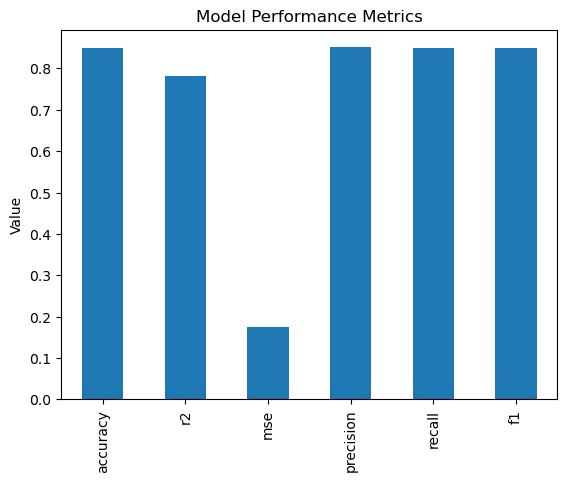

In [ ]:
df_metrics.iloc[0].plot(kind='bar')
plt.title('Model Performance Metrics')
plt.ylabel('Value')
plt.show()

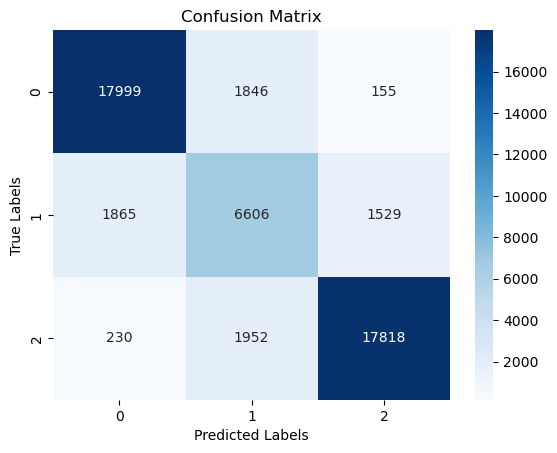

In [ ]:

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()